<a href="https://colab.research.google.com/github/Sandrine-zen/MAT-420-/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, I work with the Students Dropout and Academic Success dataset to predict each student’s final status: Graduate, Dropout, or Enrolled.
To achieve this goal, I first preprocess the data by cleaning it, scaling numerical features, and encoding categorical variables.
Then, I apply several machine-learning models such as Logistic Regression, Decision Tree, SVM, and KNN as well as a simple neural network (MLP) using PyTorch.
Finally, I compare the performance of all models to determine which one predicts student outcomes most accurately.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

import warnings
warnings.filterwarnings("ignore")



I load the dataset and look at its basic structure.
I check the first few rows, the number of samples, and the types of columns.
This helps me understand what the data looks like before building any model.

In [53]:
from google.colab import files
uploaded = files.upload()


Saving Students Dropout and Academic Success Dataset.csv to Students Dropout and Academic Success Dataset (4).csv


In [55]:
df = pd.read_csv("Students Dropout and Academic Success Dataset.csv", sep=';')


df.columns = df.columns.str.strip()

print("Shape:", df.shape)
print("\nColumns:")
print(df.columns)

print("\nFirst 5 rows:")
display(df.head())

print("\nMissing values per column:")
print(df.isna().sum())






Shape: (4424, 37)

Columns:
Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
  

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate



Missing values per column:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                  

3. Separate features and target:
I separate the data into features (X) and the target (y).
Because machine-learning models need numerical labels.
This makes the data ready for training.

In [56]:
X = df.drop("Target", axis=1)
y = df["Target"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Classes:", le.classes_)
print("First 10 encoded targets:", y_encoded[:10])


Classes: ['Dropout' 'Enrolled' 'Graduate']
First 10 encoded targets: [0 2 0 2 2 2 2 0 2 0]


4. Splitting the Data into Training and Testing Sets
I split the data into a training set and a testing set.
The training data is used to teach the model, and the test data is used to measure how well the model performs on new.and keep class proportions balanced.

In [57]:
le = LabelEncoder()
df["Target_enc"] = le.fit_transform(df["Target"])

print("LabelEncoder classes (order of encoding):", le.classes_)


X = df.drop(["Target", "Target_enc"], axis=1)
y = df["Target_enc"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


LabelEncoder classes (order of encoding): ['Dropout' 'Enrolled' 'Graduate']
Train shape: (3539, 36)
Test shape: (885, 36)


5. Scaling the Features

Many models work better when all features are on similar scales.
So in this step, I apply StandardScaler, which transforms the features so they have mean 0 and standard deviation 1.
This helps the models train more accurately.

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = X.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ]
)


6. Logistic Regression Model

I train the model on the scaled data, make predictions on the test set, and then compute accuracy and a confusion matrix.
This shows how well the model can classify the three student outcomes

In [59]:
log_reg_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        max_iter=1000,
        multi_class="multinomial",
        solver="lbfgs"
    ))
])

log_reg_clf.fit(X_train, y_train)
y_pred_log = log_reg_clf.predict(X_test)

print("Logistic Regression accuracy:", accuracy_score(y_test, y_pred_log))

print("\nConfusion matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification report (Logistic Regression):")
print(classification_report(y_test, y_pred_log, target_names=le.classes_))


Logistic Regression accuracy: 0.7581920903954802

Confusion matrix (Logistic Regression):
[[218  28  38]
 [ 34  51  74]
 [ 14  26 402]]

Classification report (Logistic Regression):
              precision    recall  f1-score   support

     Dropout       0.82      0.77      0.79       284
    Enrolled       0.49      0.32      0.39       159
    Graduate       0.78      0.91      0.84       442

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.67       885
weighted avg       0.74      0.76      0.74       885



7. Decision Tree Model

I train a decision tree and then examine its accuracy and confusion matrix.
I also visualize the tree to see how it makes decisions.

In [60]:
tree_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(
        criterion="entropy",
        max_depth=6,
        random_state=0
    ))
])

tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print("Decision Tree accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification report (Decision Tree):")
print(classification_report(y_test, y_pred_tree, target_names=le.classes_))


Decision Tree accuracy: 0.7570621468926554

Confusion matrix (Decision Tree):
[[198  43  43]
 [ 22  70  67]
 [ 12  28 402]]

Classification report (Decision Tree):
              precision    recall  f1-score   support

     Dropout       0.85      0.70      0.77       284
    Enrolled       0.50      0.44      0.47       159
    Graduate       0.79      0.91      0.84       442

    accuracy                           0.76       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.76      0.76      0.75       885



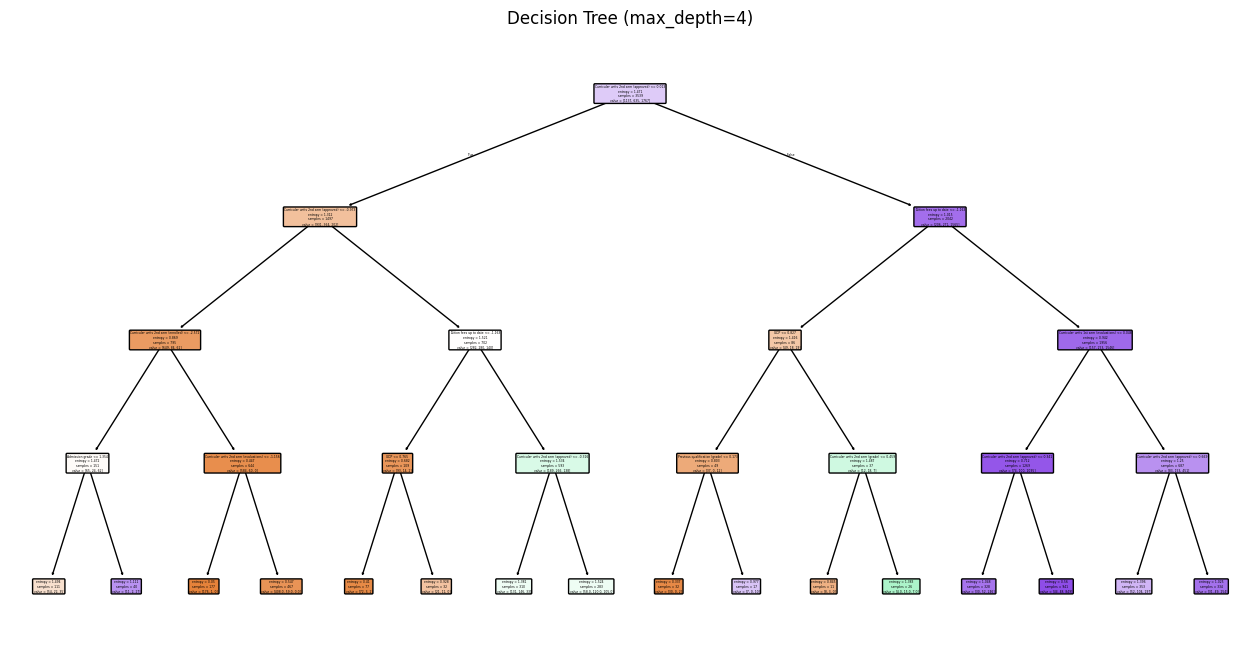

In [61]:
X_train_scaled = preprocessor.fit_transform(X_train)
simple_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=0)
simple_tree.fit(X_train_scaled, y_train)

plt.figure(figsize=(16, 8))
plot_tree(simple_tree,
          filled=True,
          rounded=True,
          feature_names=numeric_features)
plt.title("Decision Tree (max_depth=4)")
plt.show()


8. Support Vector Machine (SVM)

I use the RBF kernel and evaluate its accuracy.
This step helps me compare SVM performance with other classifiers.

In [62]:
svm_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(
        kernel="rbf",
        C=2,
    ))
])

svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

print("SVM accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification report (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))


SVM accuracy: 0.7785310734463277

Confusion matrix (SVM):
[[216  29  39]
 [ 26  65  68]
 [  9  25 408]]

Classification report (SVM):
              precision    recall  f1-score   support

     Dropout       0.86      0.76      0.81       284
    Enrolled       0.55      0.41      0.47       159
    Graduate       0.79      0.92      0.85       442

    accuracy                           0.78       885
   macro avg       0.73      0.70      0.71       885
weighted avg       0.77      0.78      0.77       885



9. K-Nearest Neighbors (KNN)

KNN classifies a new sample by looking at the closest neighbors in the dataset.

I use GridSearchCV to find the best K and the best distance metric.
Finally, I evaluate the best KNN model on the test set.

In [63]:
knn_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier(
        n_neighbors=19,
        metric="cosine"
    ))
])

knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

print("KNN accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion matrix (KNN):")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification report (KNN):")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))


KNN accuracy: 0.7152542372881356

Confusion matrix (KNN):
[[201  17  66]
 [ 22  23 114]
 [ 17  16 409]]

Classification report (KNN):
              precision    recall  f1-score   support

     Dropout       0.84      0.71      0.77       284
    Enrolled       0.41      0.14      0.21       159
    Graduate       0.69      0.93      0.79       442

    accuracy                           0.72       885
   macro avg       0.65      0.59      0.59       885
weighted avg       0.69      0.72      0.68       885



10. Building a Neural Network (MLP) Using PyTorch

In this step, I build a simple neural network.
I convert the data into PyTorch tensors, create training batches, define the model, and train it for several epochs.
Then I measure its accuracy on the test set.
This gives me a deep-learning version of the classifier.

In [64]:


scaler_torch = StandardScaler()
X_train_scaled = scaler_torch.fit_transform(X_train)
X_test_scaled  = scaler_torch.transform(X_test)

X_train_t = torch.from_numpy(X_train_scaled.astype(np.float32))
X_test_t  = torch.from_numpy(X_test_scaled.astype(np.float32))

y_train_t = torch.from_numpy(y_train.values.astype(np.int64))
y_test_t  = torch.from_numpy(y_test.values.astype(np.int64))

train_ds = TensorDataset(X_train_t, y_train_t)
batch_size = 64
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

n_samples, n_features = X_train_t.shape
n_classes = len(np.unique(y_train))
print("n_features:", n_features, " n_classes:", n_classes)


n_features: 36  n_classes: 3


In this step, I train the MLP model using mini-batch gradient descent.
The idea is to let the model learn little by little from the training data.
During each epoch, the model:

- Makes predictions on each batch

- Updates its weights using backpropagation and the optimizer

After finishing the training for one epoch, I also test the model on the test set to check how well it performs on new data.
I record both the training loss and the test accuracy so I can see if the model is improving over time.

In [71]:
train_loss_list = []
test_acc_list   = []

for epoch in range(n_epoch):
    model_mlp.train()
    for xb, yb in train_dl:
        outputs = model_mlp(xb)
        loss = lossfunc(outputs, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss_list.append(loss.item())


    model_mlp.eval()
    with torch.inference_mode():
        outputs_test = model_mlp(X_test_t)
        _, preds_test = torch.max(outputs_test, 1)
        acc = (preds_test == y_test_t).float().mean().item()
        test_acc_list.append(acc)

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{n_epoch}], "
              f"Last batch loss: {loss.item():.4f}, "
              f"Test accuracy: {acc*100:.2f}%")


Epoch [10/50], Last batch loss: 0.5072, Test accuracy: 73.22%
Epoch [20/50], Last batch loss: 0.4447, Test accuracy: 75.82%
Epoch [30/50], Last batch loss: 0.5726, Test accuracy: 76.05%
Epoch [40/50], Last batch loss: 0.5011, Test accuracy: 76.27%
Epoch [50/50], Last batch loss: 0.2569, Test accuracy: 76.38%


In this step, I plot the training loss and the test accuracy across all epochs.
These graphs help me visually check how well the MLP model learned during training.
The loss plot shows whether the model is improving, and the accuracy plot shows how well it performs on new data.

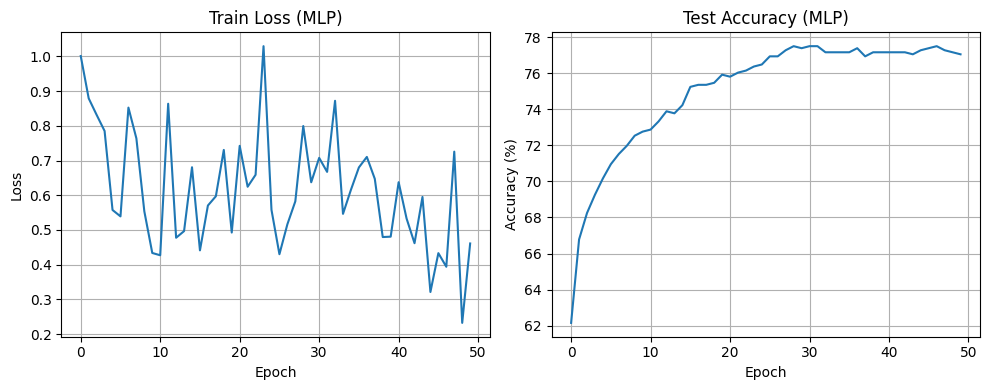

In [67]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_loss_list)
plt.title("Train Loss (MLP)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

plt.subplot(1,2,2)
plt.plot([a*100 for a in test_acc_list])
plt.title("Test Accuracy (MLP)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.tight_layout()
plt.show()


In this step, I evaluate the MLP model on the test data.
I calculate the accuracy, then I print the confusion matrix and classification report.
These results help me understand how well the model predicts each class and where it makes mistakes.

In [72]:
from sklearn.metrics import confusion_matrix, classification_report

model_mlp.eval()
with torch.inference_mode():
    outputs_test = model_mlp(X_test_t)
    _, preds_test = torch.max(outputs_test, 1)

print("MLP test accuracy:", (preds_test == y_test_t).float().mean().item())

print("\nConfusion matrix (MLP):")
print(confusion_matrix(y_test_t.numpy(), preds_test.numpy()))

print("\nClassification report (MLP):")
print(classification_report(y_test_t.numpy(), preds_test.numpy(), target_names=le.classes_))


MLP test accuracy: 0.7638418078422546

Confusion matrix (MLP):
[[221  28  35]
 [ 32  45  82]
 [ 14  18 410]]

Classification report (MLP):
              precision    recall  f1-score   support

     Dropout       0.83      0.78      0.80       284
    Enrolled       0.49      0.28      0.36       159
    Graduate       0.78      0.93      0.85       442

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885



11. Comparing All Model Accuracies

Here, I summarize all model results in one place.
I compare the accuracies of Logistic Regression, Decision Tree, SVM, KNN, and the MLP.
I also create a bar chart to visually see which model performed best.

In [69]:
results = {
    "LogisticRegression": accuracy_score(y_test, y_pred_log),
    "DecisionTree":       accuracy_score(y_test, y_pred_tree),
    "SVM (RBF)":          accuracy_score(y_test, y_pred_svm),
    "KNN (cosine, k=19)": accuracy_score(y_test, y_pred_knn),

    "MLP (PyTorch)":      (preds_test == y_test_t).float().mean().item()
}

print("\n=== Model accuracy comparison ===")
for k, v in results.items():
    print(f"{k:20s}: {v*100:.2f}%")



=== Model accuracy comparison ===
LogisticRegression  : 75.82%
DecisionTree        : 75.71%
SVM (RBF)           : 77.85%
KNN (cosine, k=19)  : 71.53%
MLP (PyTorch)       : 77.06%
